In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mawarwiliyanti","key":"9b36d17610bd35878637447fafbdf7e9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 15.6MB/s]


In [ ]:
!mkdir pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip -d pima-indians-diabetes-database
!ls pima-indians-diabetes-database

Archive:  pima-indians-diabetes-database.zip
  inflating: pima-indians-diabetes-database/diabetes.csv  
diabetes.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('pima-indians-diabetes-database/diabetes.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_duplicated = df[df.duplicated()]
df_duplicated.shape[0]

0

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
X = df.drop(labels=['Outcome'], axis=1).values
y = df['Outcome']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('train shape:', x_train.shape)
print('test shape:', x_test.shape)

train shape: (614, 8)
test shape: (154, 8)


In [ ]:
model = Sequential()

model.add(Dense(8, activation='relu', input_dim=X.shape[-1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 250 (1000.00 Byte)
Trainable params: 250 (1000.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


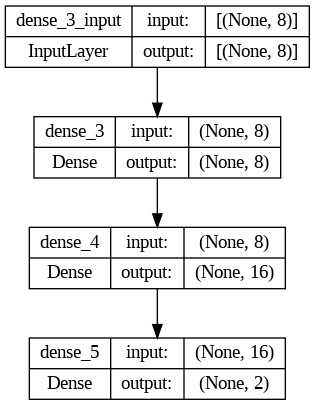

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
optim = Adam(lr=0.001)

model.compile(
    optimizer=optim,
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy']
    )

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=30,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Epoch 1/30
552/552 [==============================] - 4s 6ms/step - loss: 0.4257 - Accuracy: 0.8062 - val_loss: 0.5191 - val_Accuracy: 0.7581
Epoch 2/30
552/552 [==============================] - 1s 2ms/step - loss: 0.4331 - Accuracy: 0.7917 - val_loss: 0.5389 - val_Accuracy: 0.7419
Epoch 3/30
552/552 [==============================] - 1s 2ms/step - loss: 0.4265 - Accuracy: 0.7917 - val_loss: 0.5584 - val_Accuracy: 0.7581
Epoch 4/30
552/552 [==============================] - 1s 2ms/step - loss: 0.4492 - Accuracy: 0.7772 - val_loss: 0.5933 - val_Accuracy: 0.7097
Epoch 5/30
552/552 [==============================] - 1s 2ms/step - loss: 0.4390 - Accuracy: 0.7772 - val_loss: 0.5527 - val_Accuracy: 0.7419
Epoch 6/30
552/552 [==============================] - 1s 2ms/step - loss: 0.4335 - Accuracy: 0.8043 - val_loss: 0.5175 - val_Accuracy: 0.7097
Epoch 7/30
552/552 [==============================] - 1s 2ms/step - loss: 0.4227 - Accuracy: 0.7989 - val_loss: 0.5385 - val_Accuracy: 0.7258
Epoch 

In [ ]:
pred = np.argmax(model.predict(x_test), axis=1)
print(accuracy_score(y_test, pred))

5/5 [==============================] - 0s 3ms/step
0.7467532467532467


In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.6504 - Accuracy: 0.7468


[0.6503823399543762, 0.7467532753944397]

In [ ]:
model.predict([[0,	137,	40,	35,	168,	43.1,	2.288,	33]])

1/1 [==============================] - 0s 42ms/step


array([[0.07532511, 0.92467487]], dtype=float32)

In [ ]:
prediction = model.predict([[0,	180,	78,	63,	14,	59.4,	2.42,	25]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
  print("Diabetes")
else:
  print("No diabetes")

1/1 [==============================] - 0s 36ms/step
Diabetes


In [ ]:
prediction = model.predict([[1, 89, 66, 23, 94, 28.1, 0.167, 21]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
  print("Diabetes")
else:
  print("No diabetes")

1/1 [==============================] - 0s 36ms/step
No diabetes


In [ ]:
model.save('./diabet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('./diabet.h5')
converter =tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./diabet4.tflite", "wb").write(tflite_model)

3128